# load the trained lenet model
- explore the parameter, structure
- restart training

In [1]:
import tensorflow as tf

# trained mnist data
- saved in ./mnist_lenet/
- steps: from 0 to 50, then jump by 10 until 490
- loss and accuracy are saved in 'loss_tracc_teacc.pkl'

In [2]:
import pickle
data_dir = './mnist_lenet/'
steps,lo,tr_acc,te_acc = pickle.load(open(data_dir+'loss_tracc_teacc.pkl'))

# delve the last checkpoint

In [3]:
fname = 'model-%d'%steps[-1]
meta_fname = fname+'.meta'

# load the graph into default graph
new_saver = tf.train.import_meta_graph(data_dir+meta_fname)
for v in tf.trainable_variables():
    print v.name

conv1/weights:0
conv1/biases:0
conv2/weights:0
conv2/biases:0
fc1/weights:0
fc1/biases:0
fc2/weights:0
fc2/biases:0


# eval and train the model

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
x = tf.get_collection('x')[0]
y_ = tf.get_collection('y')[0]
accuracy = tf.get_collection('accuracy')[0]
cross_entropy  = tf.get_collection('loss')[0]
print fname
with tf.Session() as sess:
    new_saver.restore(sess, data_dir+fname)
    test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    print test_accuracy
    print("step %d--loss:%.4g, \t training accuracy %g\t test accuracy %g"%(steps[-1],
                                                                            lo[-1],
                                                                            tr_acc[-1],
                                                                            te_acc[-1]))

model-490
0.9419
step 490--loss:0.2505, 	 training accuracy 0.88	 test accuracy 0.9419


In [6]:
# train the model
train_step = tf.get_collection('train_op')[0]
final_paras=[]
final_names=[]
with tf.Session() as sess:
    new_saver.restore(sess, data_dir+fname)
    for i in range(10000):
        batch = mnist.train.next_batch(50)
        if i%1000 == 0:
            train_accuracy,lo = sess.run([accuracy,cross_entropy],feed_dict={x:batch[0], y_: batch[1]})
            test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            print("step %d--loss:%.4g, \t training accuracy %g\t test accuracy %g"%(i, lo,train_accuracy,test_accuracy))

        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    for v in tf.trainable_variables():
        final_names.append(v.name)
        final_paras.append(v.eval(sess))

step 0--loss:0.2033, 	 training accuracy 0.94	 test accuracy 0.9419
step 1000--loss:0.1049, 	 training accuracy 0.96	 test accuracy 0.9763
step 2000--loss:0.04458, 	 training accuracy 0.98	 test accuracy 0.982
step 3000--loss:0.04234, 	 training accuracy 0.98	 test accuracy 0.98
step 4000--loss:0.004336, 	 training accuracy 1	 test accuracy 0.9852
step 5000--loss:0.01898, 	 training accuracy 1	 test accuracy 0.9851
step 6000--loss:0.008021, 	 training accuracy 1	 test accuracy 0.9872
step 7000--loss:0.0103, 	 training accuracy 1	 test accuracy 0.9855
step 8000--loss:0.04673, 	 training accuracy 0.98	 test accuracy 0.9895
step 9000--loss:0.00938, 	 training accuracy 1	 test accuracy 0.9897


# visualize the parameter

In [7]:
%pylab inline
conv1_weight = final_paras[0]
conv1_bias = final_paras[1]

Populating the interactive namespace from numpy and matplotlib


[[-0.11042504 -0.09878563 -0.07490713 -0.01092591  0.0868291 ]
 [-0.04492281 -0.12828325 -0.07834356  0.00445791  0.06454389]
 [ 0.0279236  -0.06587035 -0.01119255  0.14779261  0.02896595]
 [-0.12677501 -0.05215375  0.03275673  0.01737     0.03087784]
 [-0.04788135  0.14661795  0.05549496  0.17311856  0.05876615]]


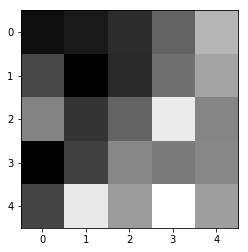

In [8]:
imshow(conv1_weight[:,:,0,0],cmap='gray',interpolation='nearest')
print conv1_weight[:,:,0,0]

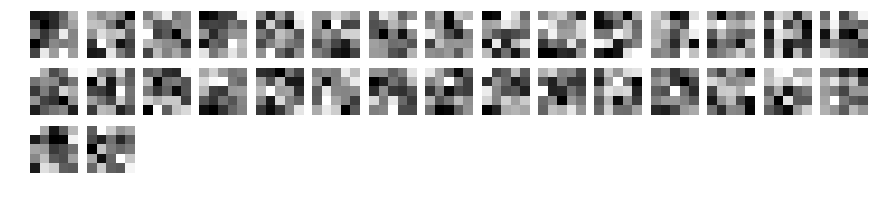

In [9]:
figure(figsize=(15,3))
for i in range(32):
    subplot(3,15,i+1)
    imshow(conv1_weight[:,:,0,i],cmap='gray',interpolation='nearest')    
    axis('off')

# See the first 50 model

In [10]:
data_dir = './mnist_lenet/'
all_paras = []
for s in steps[0:50]:
    fname = 'model-%d'%s
    meta_fname = fname+'.meta'
    print fname

    paras = []
    names = []
    with tf.Session() as sess:
        new_saver.restore(sess, data_dir+fname)
        for v in tf.trainable_variables():
            names.append(v.name)
            paras.append(v.eval(sess))
    all_paras.append([names,paras])

model-0
model-1
model-2
model-3
model-4
model-5
model-6
model-7
model-8
model-9
model-10
model-11
model-12
model-13
model-14
model-15
model-16
model-17
model-18
model-19
model-20
model-21
model-22
model-23
model-24
model-25
model-26
model-27
model-28
model-29
model-30
model-31
model-32
model-33
model-34
model-35
model-36
model-37
model-38
model-39
model-40
model-41
model-42
model-43
model-44
model-45
model-46
model-47
model-48
model-49


- we first evaluate the model with the parameter we save to check correctness

In [11]:
steps,lo,tr_acc,te_acc = pickle.load(open(data_dir+'loss_tracc_teacc.pkl'))
tf.reset_default_graph()
new_saver = tf.train.import_meta_graph(data_dir+meta_fname)
x = tf.get_collection('x')[0]
y_ = tf.get_collection('y')[0]
accuracy = tf.get_collection('accuracy')[0]

for i in range(50):
    paras = all_paras[i][1]
    with tf.Session() as sess:
        ops=[]
        for index,v in enumerate(tf.trainable_variables()):
            ops.append(v.assign(paras[index]))
        sess.run(ops)
        test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        print i,test_accuracy,te_acc[i]

0 0.1232 0.1232
1 0.1368 0.1368
2 0.1185 0.1185
3 0.1278 0.1278
4 0.1408 0.1408
5 0.1562 0.1562
6 0.165 0.165
7 0.1764 0.1764
8 0.2048 0.2048
9 0.2213 0.2213
10 0.2204 0.2204
11 0.2369 0.2369
12 0.2747 0.2747
13 0.3017 0.3017
14 0.324 0.324
15 0.355 0.355
16 0.3899 0.3899
17 0.4173 0.4173
18 0.4436 0.4436
19 0.4664 0.4664
20 0.4828 0.4828
21 0.5057 0.5057
22 0.5359 0.5359
23 0.5679 0.5679
24 0.5938 0.5938
25 0.5999 0.5999
26 0.5996 0.5996
27 0.5959 0.5959
28 0.6053 0.6053
29 0.6278 0.6278
30 0.6513 0.6513
31 0.6659 0.6659
32 0.6773 0.6773
33 0.6878 0.6878
34 0.7049 0.7049
35 0.7211 0.7211
36 0.7347 0.7347
37 0.7392 0.7392
38 0.7379 0.7379
39 0.7385 0.7385
40 0.7389 0.7389
41 0.7505 0.7505
42 0.7646 0.7646
43 0.7737 0.7737
44 0.7784 0.7784
45 0.7733 0.7733
46 0.7659 0.7659
47 0.7667 0.7667
48 0.7708 0.7708
49 0.7762 0.7762


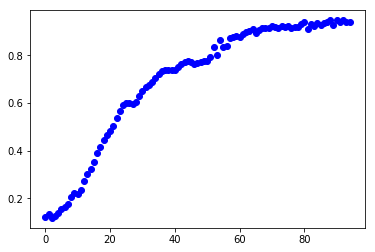

In [14]:
plot(range(95),te_acc,'bo')

## how conv1 weight changes?

In [ ]:
figure(figsize=(15,4))
suptitle('model-1~49')

index = 0

paras = all_paras[0][1]
conv1_weight =  paras[0]
diffs = []
for i in range(50):
    paras = all_paras[i][1]
    new_conv1_weight =  paras[0]
    diffs.append(np.sum(np.abs(new_conv1_weight-conv1_weight)))
    conv1_weight = new_conv1_weight
    
    subplot(4,15,i+1)
    imshow(new_conv1_weight[:,:,0,index],cmap='gray',interpolation='nearest')    
    axis('off')
    
# paras = final_paras
# new_conv1_weight =  paras[0]
# diffs.append(np.sum(np.abs(new_conv1_weight-conv1_weight)))
# conv1_weight = new_conv1_weight
# subplot(4,15,51)
# imshow(new_conv1_weight[:,:,0,index],cmap='gray',interpolation='nearest')  

show()
figure()
plot(range(len(diffs)),diffs,'bo')

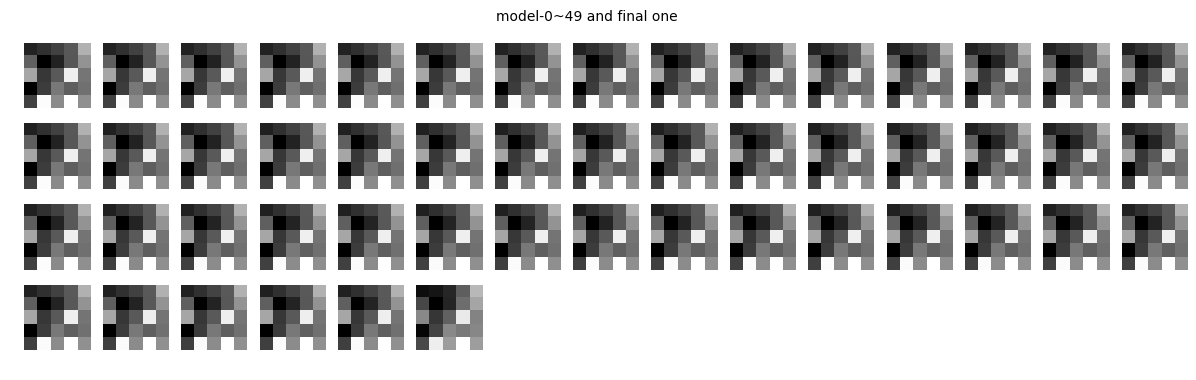

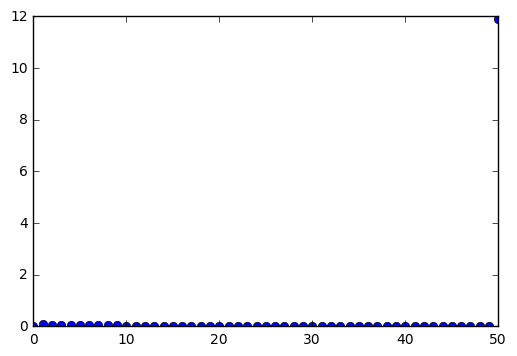

In [19]:
figure(figsize=(15,4))
suptitle('model-0~49 and final one')

index = 0

paras = all_paras[0][1]
conv1_weight =  paras[0]
diffs = []
for i in range(50):
    paras = all_paras[i][1]
    new_conv1_weight =  paras[0]
    diffs.append(np.sum(np.abs(new_conv1_weight-conv1_weight)))
    conv1_weight = new_conv1_weight
    
    subplot(4,15,i+1)
    imshow(new_conv1_weight[:,:,0,index],cmap='gray',interpolation='nearest')    
    axis('off')
    
paras = final_paras
new_conv1_weight =  paras[0]
diffs.append(np.sum(np.abs(new_conv1_weight-conv1_weight)))
conv1_weight = new_conv1_weight
subplot(4,15,51)
imshow(new_conv1_weight[:,:,0,index],cmap='gray',interpolation='nearest')  
axis('off')

show()
figure()
plot(range(len(diffs)),diffs,'bo')

# Found
we found that the kernel looks "the same" as its initial one.  So let's check this further

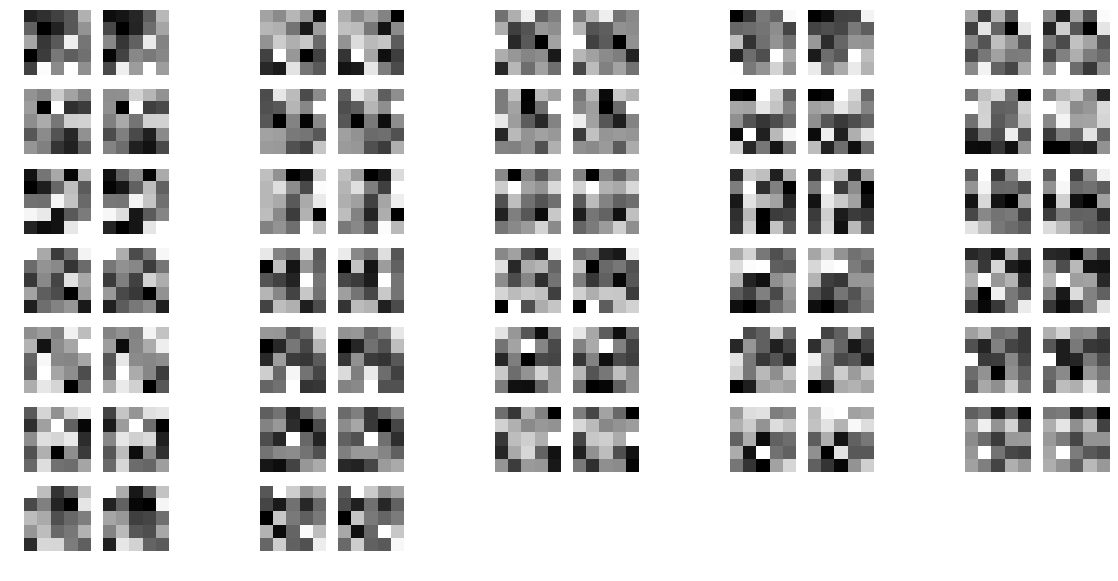

In [23]:
figure(figsize=(15,7))
initial_paras = all_paras[0][1]
for i in range(32):
    subplot(7,15,3*i+1)
    imshow(initial_paras[0][:,:,0,i],cmap='gray',interpolation='nearest')    
    axis('off')

    subplot(7,15,3*i+2)
    imshow(final_paras[0][:,:,0,i],cmap='gray',interpolation='nearest')    
    axis('off')
    

## conclusion: the value of first conv layer doesn't change a lot !!!

# what about conv2?

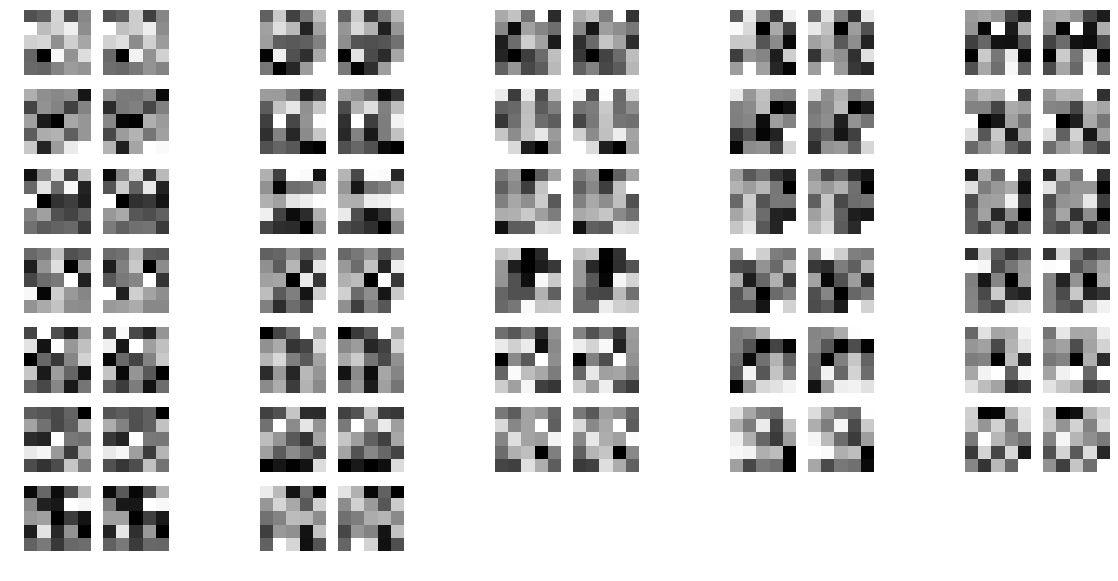

In [24]:
figure(figsize=(15,7))
initial_paras = all_paras[0][1]
for i in range(32):
    subplot(7,15,3*i+1)
    imshow(initial_paras[2][:,:,0,i],cmap='gray',interpolation='nearest')    
    axis('off')

    subplot(7,15,3*i+2)
    imshow(final_paras[2][:,:,0,i],cmap='gray',interpolation='nearest')    
    axis('off')

# save the parameters for further exploration

In [25]:
outfile = open('parameter-0-49-9000.pkl','wb')
pickle.dump([all_paras,final_paras],outfile)
outfile.close()

# how the statistics change? for mean and variance of each layer

# visualization the network!